In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import json
import os
import re

In [2]:
def parse_scenario_name(scenario_name):
    regex = 'sp\.(\w+)_ep\.(\w+)_hs\.(\d+|\d+\.\d+)_hc\.(\d+)\.json'
    match = re.search(regex, scenario_name)
    #print(scenario_name)
    return {
        'start_point': match.group(1),
        'end_point': match.group(2),
        'human_speed': float(match.group(3)),
        'human_count': int(match.group(4))
    }

parse_scenario_name('sp.fh_ep.ld_hs.2_hc.25.json')

{'start_point': 'fh', 'end_point': 'ld', 'human_speed': 2.0, 'human_count': 25}

In [7]:
def load_evals(run):
    eval_dir = os.path.join('evals', run)
    eval_files = os.listdir(eval_dir)
    evals = list()
    for eval_file in eval_files:
        eval_file_path = os.path.join(eval_dir, eval_file)
        with open(eval_file_path, 'r') as f:
            file_contents = f.read()
            scenario_info = parse_scenario_name(eval_file)
            eval_data = json.loads(file_contents)
            eval_data['scenario'] = scenario_info
            evals.append(eval_data)
    return pd.json_normalize(evals)

df = load_evals('1603866794')
df.loc[df['time_to_goal'] >= 20, 'time_to_goal'] = None
df.head()

,time_to_goal,collision_count,min_distance_to_human,forces,blame,speed_stats.mean,difference_in_speed_with_near_humans.mean,difference_in_speed_with_near_humans.stdev,scenario.start_point,scenario.end_point,scenario.human_speed,scenario.human_count
0,NaN,6,0.056505,"[0.11878928035137686, 6.511617028719155e-06, 6...","[0.6638696558188402, 0.6634439042548282, 0.663...",0.300311,-1.302442,0.564541,fh,ld,1.5,10
1,NaN,12,0.042207,"[0.1201985708910063, 0.002741564714486556, 6.6...","[0.6637264200927175, 0.6622198844948997, 0.661...",0.342043,-1.265397,0.606068,fh,ld,1.5,20
2,7.062852,0,3.261251,"[0.11917634695789626, 0.11808469339260766, 0.1...","[0.6668151058588372, 0.6664630795384665, 0.666...",1.985484,NaN,NaN,fh,ld,1.5,1
3,NaN,3,0.226087,"[0.11909266279938184, 0.0069672635356141065, 9...","[0.6601400739353737, 0.6596248788416025, 0.659...",0.515518,-1.115705,0.701175,fh,ld,1.5,25
4,NaN,9,0.119565,"[0.12384527214886917, 0.0004952041543990511, 4...","[0.6642940779416171, 0.6638656124299287, 0.663...",0.126637,-1.411522,0.355653,fh,ld,1.5,15


In [8]:
success = df['time_to_goal'].notna()
successes = df[success]
successes.head()

,time_to_goal,collision_count,min_distance_to_human,forces,blame,speed_stats.mean,difference_in_speed_with_near_humans.mean,difference_in_speed_with_near_humans.stdev,scenario.start_point,scenario.end_point,scenario.human_speed,scenario.human_count
2,7.062852,0,3.261251,"[0.11917634695789626, 0.11808469339260766, 0.1...","[0.6668151058588372, 0.6664630795384665, 0.666...",1.985484,NaN,NaN,fh,ld,1.5,1


In [9]:
def split_data(start_point, end_point):
    data = df
    data = data[data['scenario.start_point'] == start_point]
    data = data[data['scenario.end_point'] == end_point]
    return data

fh_to_ld = split_data('fh', 'ld')

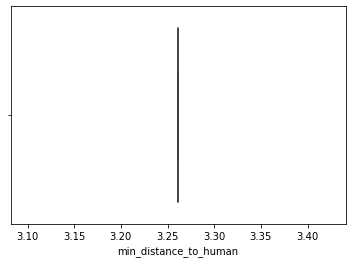

In [10]:
sns.boxplot(x=successes['min_distance_to_human'])

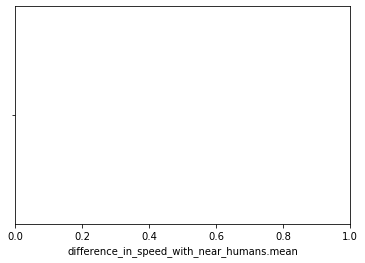

In [11]:
sns.boxplot(x=successes['difference_in_speed_with_near_humans.mean'])

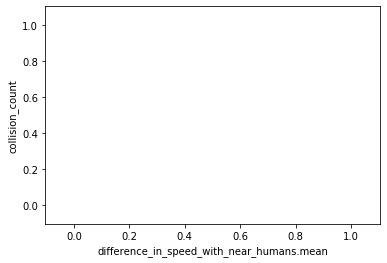

In [12]:
sns.regplot(x='difference_in_speed_with_near_humans.mean', y='collision_count', data=successes)
# TODO: split speeds by state

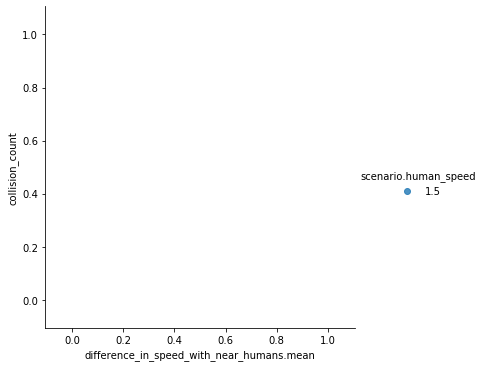

In [13]:
sns.lmplot(x='difference_in_speed_with_near_humans.mean', y='collision_count', data=successes, hue='scenario.human_speed')

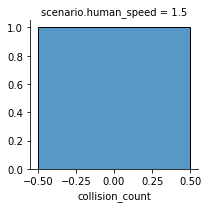

In [14]:
g = sns.FacetGrid(successes, col="scenario.human_speed")
g.map(sns.histplot, "collision_count")

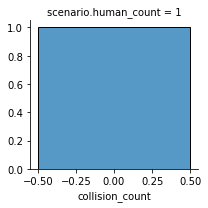

In [21]:
g = sns.FacetGrid(successes, col="scenario.human_count")
g.map(sns.histplot, "collision_count")
f = df['forces'][0]

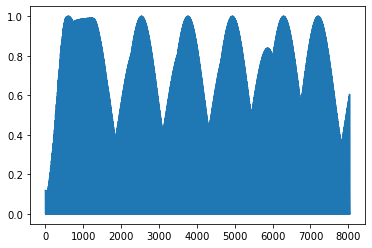

In [23]:
sns.lineplot(data=df['forces'][0])

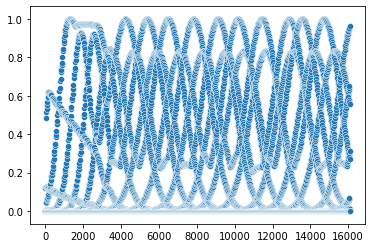

In [24]:
sns.scatterplot(data=df['forces'][1])

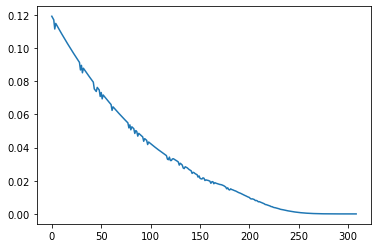

In [15]:
sns.lineplot(data=df['forces'][2])

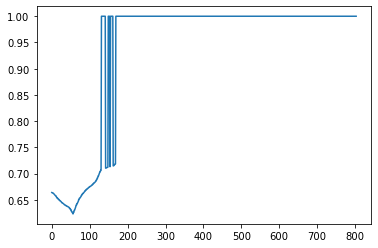

In [20]:
sns.lineplot(data=df['blame'][0])

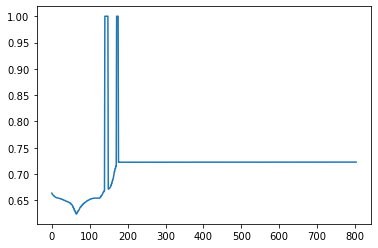

In [19]:
sns.lineplot(data=df['blame'][1])

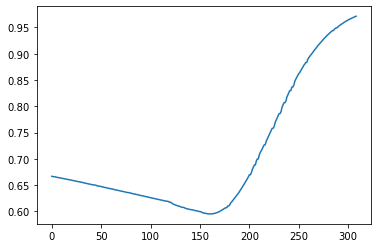

In [16]:
sns.lineplot(data=df['blame'][2])

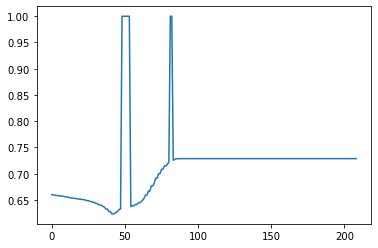

In [21]:
sns.lineplot(data=df['blame'][3])

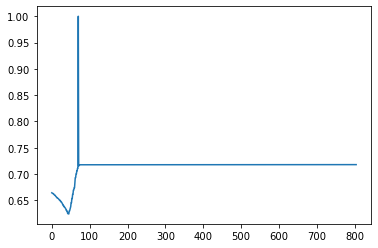

In [22]:
sns.lineplot(data=df['blame'][4])